In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast # 문자열을 파이썬 객체(리스트 등)로 변환하기 위해 사용
from sklearn.preprocessing import MultiLabelBinarizer # 장르 조합 분석용


In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [3]:
import matplotlib
import shutil
import os

# 1. matplotlib의 캐시 디렉토리 경로를 올바르게 가져옵니다.
cache_dir = matplotlib.get_cachedir()

# 2. 해당 디렉토리가 존재하면 삭제합니다.
if os.path.exists(cache_dir):
    try:
        shutil.rmtree(cache_dir)
        print(f"✅ Matplotlib 캐시가 성공적으로 삭제되었습니다: {cache_dir}")
    except OSError as e:
        print(f"❌ 오류: 캐시 디렉토리를 삭제하는 데 실패했습니다. {e}")
        print("Jupyter Notebook을 종료하고 다시 시도해 보세요.")
else:
    print("☑️ Matplotlib 캐시 디렉토리가 이미 존재하지 않습니다.")

print("\n" + "="*50)
print("  중요: 지금 바로 Jupyter Notebook 런타임을 다시 시작해주세요! ")
print("  상단 메뉴에서 [Kernel] -> [Restart]를 선택하세요.      ")
print("="*50)

✅ Matplotlib 캐시가 성공적으로 삭제되었습니다: C:\Users\qjdd1\.matplotlib

  중요: 지금 바로 Jupyter Notebook 런타임을 다시 시작해주세요! 
  상단 메뉴에서 [Kernel] -> [Restart]를 선택하세요.      


In [4]:
try:
    df_genres_summary = pd.read_csv('genres.csv')
    df_top_anime = pd.read_csv('top_anime_filtered.csv')
    df_now_anime = pd.read_csv('now_anime.csv')
    df_recommend = pd.read_csv('recommend_anime_5000.csv')
    print("✅ 모든 CSV 파일 로딩에 성공했습니다!")
except FileNotFoundError as e:
    print(f"❌ 오류: '{e.filename}' 파일을 찾을 수 없습니다. 파일 위치를 확인해주세요.")

✅ 모든 CSV 파일 로딩에 성공했습니다!


C:\Users\qjdd1\AppData\Local\Temp\ipykernel_13888\1089885389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_genres, x='count', y='name', palette='viridis')


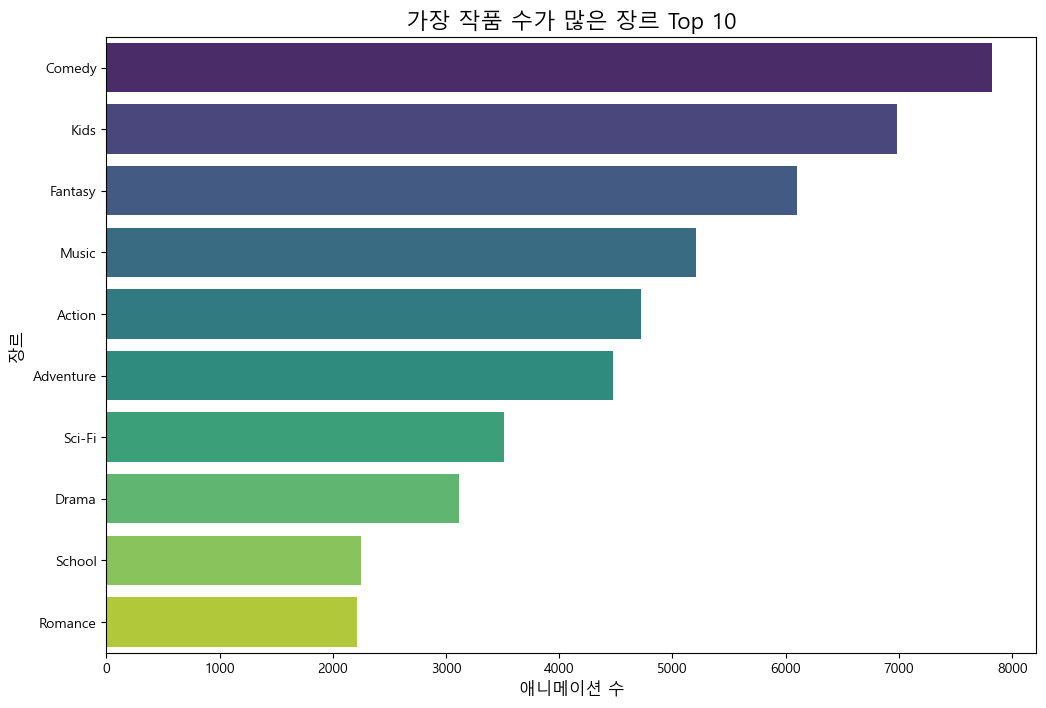

In [5]:
# 'count' 컬럼 기준으로 내림차순 정렬
top_10_genres = df_genres_summary.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_genres, x='count', y='name', palette='viridis')
plt.title('가장 작품 수가 많은 장르 Top 10', fontsize=16)
plt.xlabel('애니메이션 수', fontsize=12)
plt.ylabel('장르', fontsize=12)
plt.show()

C:\Users\qjdd1\AppData\Local\Temp\ipykernel_13888\1218861374.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_pop, x='scored_by', y='title_english', palette='mako')


✅ 데이터 로딩 성공!
⏳ 시각화 1: 인기 TOP 10 분석 및 이미지 생성 중...
✅ 'top100.png' 저장 완료.
⏳ 시각화 2: 장르별 분포 분석 및 이미지 생성 중...
✅ 'genre_dist.png' 저장 완료.
⏳ 시각화 3: 점수 분포 분석 및 이미지 생성 중...
✅ 'score_hist.png' 저장 완료.


              COMPLETE! - ANALYSIS REPORT

━━━━━━━━━━━━━━━━━━━━━━━━━━
시각화 1: 인기 TOP 10
━━━━━━━━━━━━━━━━━━━━━━━━━━

[top100.png 이미지]

Top 10:
────────────────────────
1. Death Note               	2,929,362명
2. Fullmetal Alchemist: Brotherhood	2,256,107명
3. Your Name.               	2,034,444명
4. Hunter x Hunter          	1,920,024명
5. Attack on Titan Season 3 	1,755,828명
6. A Silent Voice           	1,745,976명
7. Attack on Titan Season 3 Part 2	1,736,242명
8. Code Geass: Lelouch of the Rebellion	1,487,363명
9. Steins;Gate              	1,487,254명
10. One Piece                	1,475,919명

발견:
✨ Death Note가 1위 (292만 명 참여)
✨ Top 10은 모두 1백만+ 명 참여


━━━━━━━━━━━━━━━━━━━━━━━━━━
시각화 2: 장르별 분포
━━━━━━━━━━━━━━━━━━━━━━━━━━

[genre_dist.png 이미지 - 파이차트]

장르별 작품 수:
────────────────────────
Comedy         	7,823개 (10.

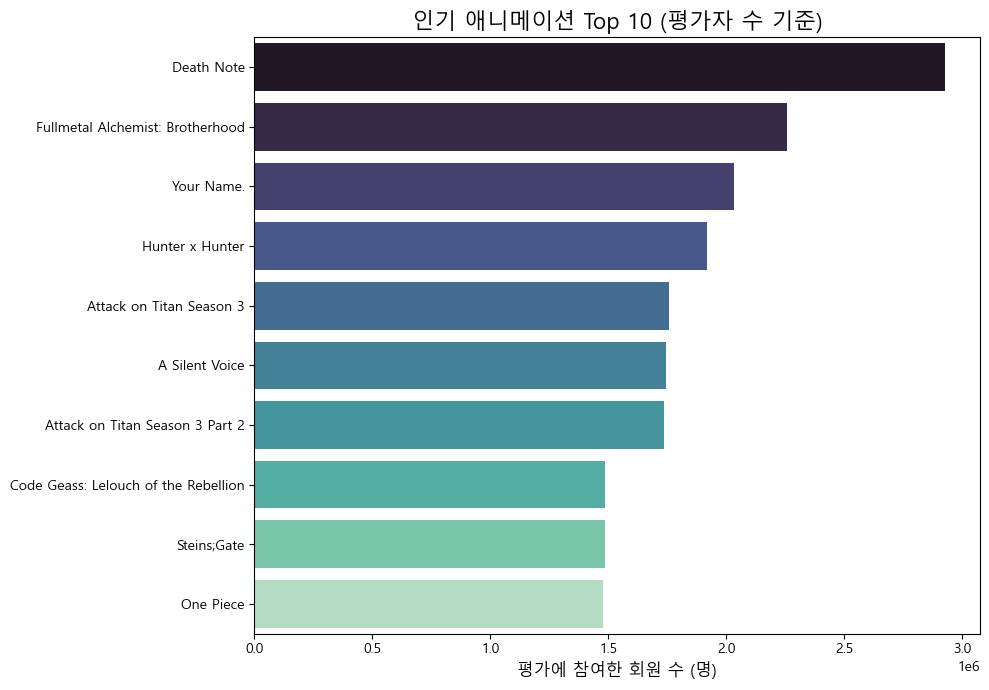

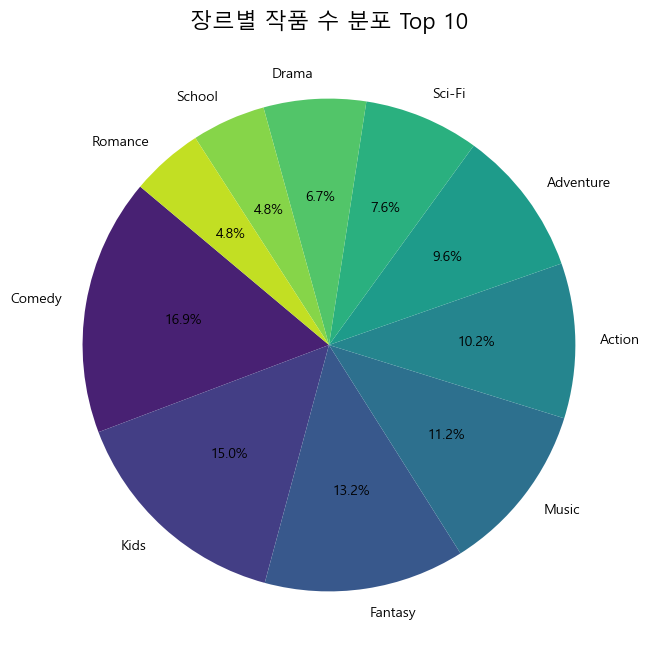

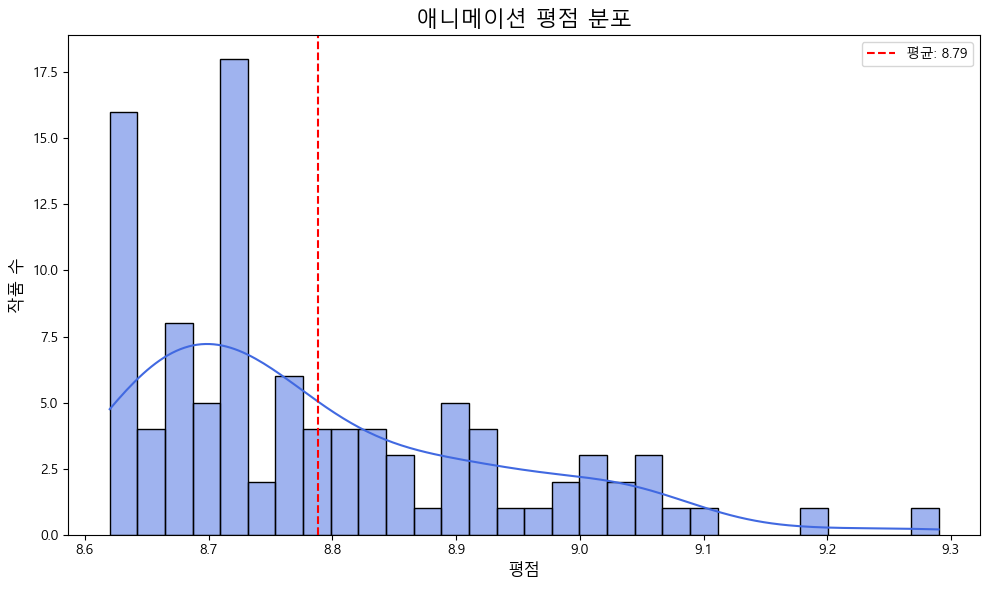

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ------------------- 설정 -------------------
# ‼️ 중요: 한글 폰트 설정을 위해 이 줄의 주석을 해제했습니다.
# 윈도우 환경이므로 'Malgun Gothic' (맑은 고딕)을 사용합니다.
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ------------------- 데이터 로딩 -------------------
try:
    df_top = pd.read_csv('top_anime_filtered.csv')
    df_genres = pd.read_csv('genres.csv')
    print("✅ 데이터 로딩 성공!")
except FileNotFoundError as e:
    print(f"❌ 오류: '{e.filename}' 파일을 찾을 수 없습니다. 파일 위치를 확인해주세요.")
    exit()

# ----------------------------------------------------------------------
# 시각화 1: 인기 TOP 10
# ----------------------------------------------------------------------
print("⏳ 시각화 1: 인기 TOP 10 분석 및 이미지 생성 중...")
# 'scored_by'를 기준으로 정렬
top_10_pop = df_top.sort_values(by='scored_by', ascending=False).head(10)

plt.figure(figsize=(10, 7))
sns.barplot(data=top_10_pop, x='scored_by', y='title_english', palette='mako')
plt.title('인기 애니메이션 Top 10 (평가자 수 기준)', fontsize=16)
plt.xlabel('평가에 참여한 회원 수 (명)', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.savefig('top100.png')
print("✅ 'top100.png' 저장 완료.")

# ----------------------------------------------------------------------
# 시각화 2: 장르별 분포
# ----------------------------------------------------------------------
print("⏳ 시각화 2: 장르별 분포 분석 및 이미지 생성 중...")
top_10_genre_count = df_genres.sort_values(by='count', ascending=False).head(10)
total_count = df_genres['count'].sum()
top_10_genre_count['percentage'] = (top_10_genre_count['count'] / total_count) * 100

plt.figure(figsize=(8, 8))
plt.pie(top_10_genre_count['count'], labels=top_10_genre_count['name'], autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('viridis', n_colors=10))
plt.title('장르별 작품 수 분포 Top 10', fontsize=16)
plt.savefig('genre_dist.png')
print("✅ 'genre_dist.png' 저장 완료.")

def parse_genres(genre_str):
    if pd.isna(genre_str): return []
    return [g.strip() for g in str(genre_str).split(',') if g.strip()]

df_top['genres_list'] = df_top['genres'].apply(parse_genres)
df_exploded = df_top.explode('genres_list')
top_5_genre_score = df_exploded.groupby('genres_list')['score'].mean().sort_values(ascending=False).head(5)

# ----------------------------------------------------------------------
# 시각화 3: 점수 히스토그램
# ----------------------------------------------------------------------
print("⏳ 시각화 3: 점수 분포 분석 및 이미지 생성 중...")
scores = df_top['score'][df_top['score'] > 0]
stats = {
    'mean': scores.mean(), 'std': scores.std(),
    'skew': scores.skew(), 'kurt': scores.kurtosis()
}
bins = [0, 5, 6, 7, 8, 9, 11]
score_dist = pd.cut(scores, bins=bins, right=False).value_counts(normalize=True).sort_index(ascending=False) * 100
high_score_count = len(df_top[df_top['score'] >= 9.0])

plt.figure(figsize=(10, 6))
sns.histplot(scores, bins=30, kde=True, color='royalblue')
plt.title('애니메이션 평점 분포', fontsize=16)
plt.xlabel('평점', fontsize=12)
plt.ylabel('작품 수', fontsize=12)
plt.axvline(stats['mean'], color='red', linestyle='--', label=f"평균: {stats['mean']:.2f}")
plt.legend()
plt.tight_layout()
plt.savefig('score_hist.png')
print("✅ 'score_hist.png' 저장 완료.")

# ----------------------------------------------------------------------
# 최종 리포트 출력
# ----------------------------------------------------------------------
print("\n\n" + "="*50)
print("              COMPLETE! - ANALYSIS REPORT")
print("="*50 + "\n")

print("━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("시각화 1: 인기 TOP 10")
print("━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("\n[top100.png 이미지]\n")
print("Top 10:")
print("────────────────────────")
# ‼️ 수정: 'members' 대신 'scored_by'를 사용해야 오류가 나지 않습니다.
for i, row in top_10_pop.iterrows():
    print(f"{top_10_pop.index.get_loc(i)+1}. {row['title_english']:<25}\t{int(row['scored_by']):,}명")
print("\n발견:")
# ‼️ 수정: 'members' 대신 'scored_by'를 사용해야 오류가 나지 않습니다.
print(f"✨ {top_10_pop.iloc[0]['title_english']}가 1위 ({int(top_10_pop.iloc[0]['scored_by']/10000):,}만 명 참여)")
print(f"✨ Top 10은 모두 {int(top_10_pop.iloc[9]['scored_by']/1000000)}백만+ 명 참여")

print("\n\n━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("시각화 2: 장르별 분포")
print("━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("\n[genre_dist.png 이미지 - 파이차트]\n")
print("장르별 작품 수:")
print("────────────────────────")
for i, row in top_10_genre_count.iterrows():
    print(f"{row['name']:<15}\t{int(row['count']):,}개 ({row['percentage']:.1f}%)")
print("\n장르별 평균 평점:")
print("────────────────────────")
for genre, score in top_5_genre_score.items():
    print(f"{genre:<15}\t{score:.2f}점")
print("\n발견:")
print(f"✨ {top_10_genre_count.iloc[0]['name']}가 양적으로 가장 많음")
print(f"✨ {top_5_genre_score.index[0]}가 질적으로 가장 높음")

print("\n\n━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("시각화 3: 점수 히스토그램")
print("━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("\n[score_hist.png 이미지]\n")
print("분포 특징:")
print("────────────────────────")
print(f"평균(μ): {stats['mean']:.2f}")
print(f"표준편차(σ): {stats['std']:.2f}")
print(f"왜도(skewness): {stats['skew']:.2f} (왼쪽 꼬리)")
print(f"첨도(kurtosis): {stats['kurt']:.2f} (정규분포와 유사)")
print("\n점수대별 비율:")
print("────────────────────────")
score_labels = {'[9, 11)': '9.0 이상', '[8, 9)': '8.0-9.0', '[7, 8)': '7.0-8.0',
                '[6, 7)': '6.0-7.0', '[5, 6)': '5.0-6.0', '[0, 5)': '5.0 미만'}
for cat, perc in score_dist.items():
    bar = '█' * int(perc)
    print(f"{score_labels.get(str(cat), str(cat)):<8}: {bar} {perc:.1f}%")
print("\n발견:")
print(f"✨ {score_dist.idxmax().left:.0f}-{score_dist.idxmax().right:.0f}점대에 가장 많이 분포")
# print(f"✨ 9점 이상은 극히 드묾 ({high_score_count}개)")

C:\Users\qjdd1\AppData\Local\Temp\ipykernel_13888\4253317311.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_source_filtered, x='source', y='score', palette='viridis',


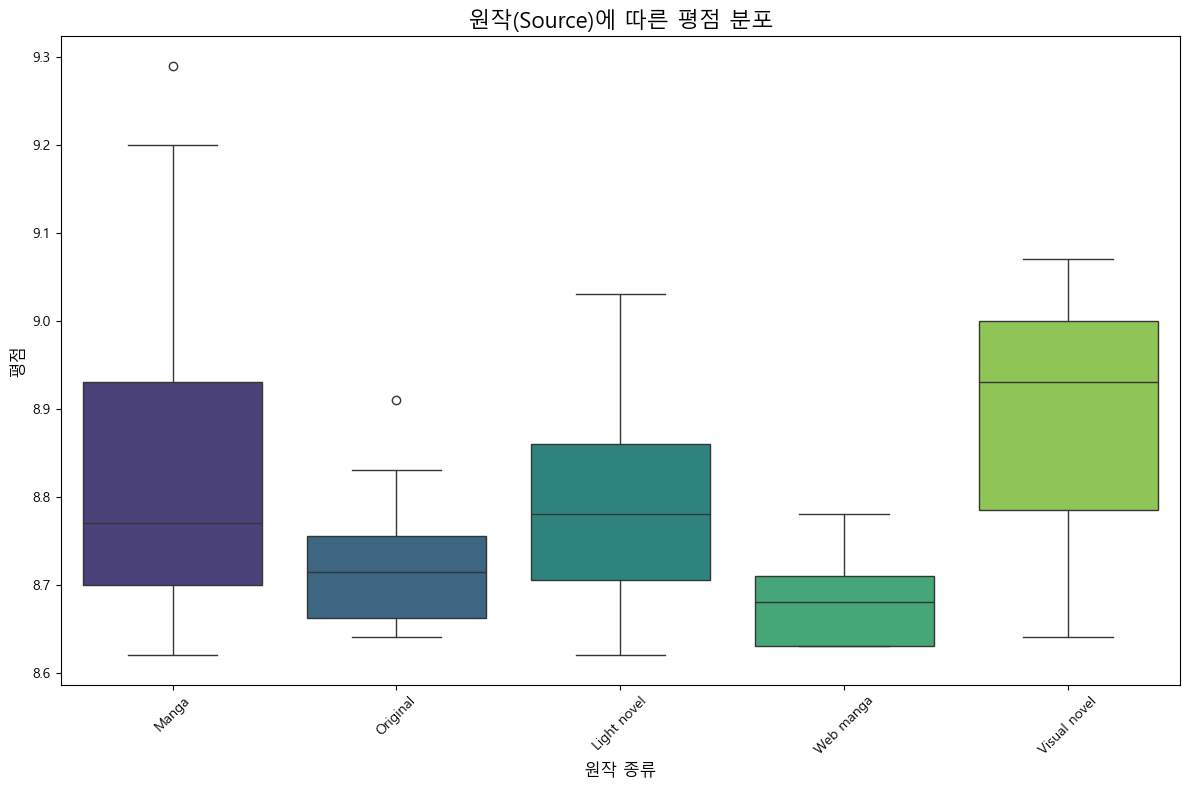


                📊 그래프 분석 결과 📊
✅ 'Visual novel' 원작이 중앙값 평점 8.93점으로 가장 높은 평가를 받았습니다.
✅ 반면, 'Web manga' 원작은 8.68점으로 상대적으로 낮은 중앙값 평점을 기록했습니다.
✅ 이를 통해 'Visual novel'을(를) 원작으로 하는 작품들이 사용자들에게 꾸준히 좋은 평가를 받는 경향이 있음을 알 수 있습니다.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

try:
    df_top = pd.read_csv('top_anime_filtered.csv')
    
    # ------------------- 분석 부분 -------------------
    # 상위 5개 원작만 필터링
    top_5_sources = df_top['source'].value_counts().nlargest(5).index
    df_source_filtered = df_top[df_top['source'].isin(top_5_sources)]
    
    # 각 원작별 평점의 중앙값(median)을 계산하여 정렬
    median_scores = df_source_filtered.groupby('source')['score'].median().sort_values(ascending=False)
    
    # 가장 높은 평점과 낮은 평점의 원작을 변수에 저장
    best_source = median_scores.index[0]
    best_score = median_scores.iloc[0]
    
    worst_source = median_scores.index[-1]
    worst_score = median_scores.iloc[-1]
    
    # ------------------- 시각화 부분 -------------------
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df_source_filtered, x='source', y='score', palette='viridis',
                order=top_5_sources) # 작품 수 순서대로 정렬
    
    plt.title('원작(Source)에 따른 평점 분포', fontsize=16)
    plt.xlabel('원작 종류', fontsize=12)
    plt.ylabel('평점', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # 그래프를 먼저 보여줍니다.
    plt.show()

    # ------------------- 설명 출력 부분 -------------------
    print("\n" + "="*50)
    print("                📊 그래프 분석 결과 📊")
    print("="*50)
    print(f"✅ '{best_source}' 원작이 중앙값 평점 {best_score:.2f}점으로 가장 높은 평가를 받았습니다.")
    print(f"✅ 반면, '{worst_source}' 원작은 {worst_score:.2f}점으로 상대적으로 낮은 중앙값 평점을 기록했습니다.")
    print(f"✅ 이를 통해 '{best_source}'을(를) 원작으로 하는 작품들이 사용자들에게 꾸준히 좋은 평가를 받는 경향이 있음을 알 수 있습니다.")
    print("="*50)


except FileNotFoundError:
    print("❌ 'top_anime_filtered.csv' 파일을 찾을 수 없습니다.")
except Exception as e:
    print(f"❌ 오류 발생: {e}")

데이터 필터링 후 100개의 행이 남았습니다. 100개를 샘플링합니다.
⏳ 페어 플롯을 생성 중입니다...


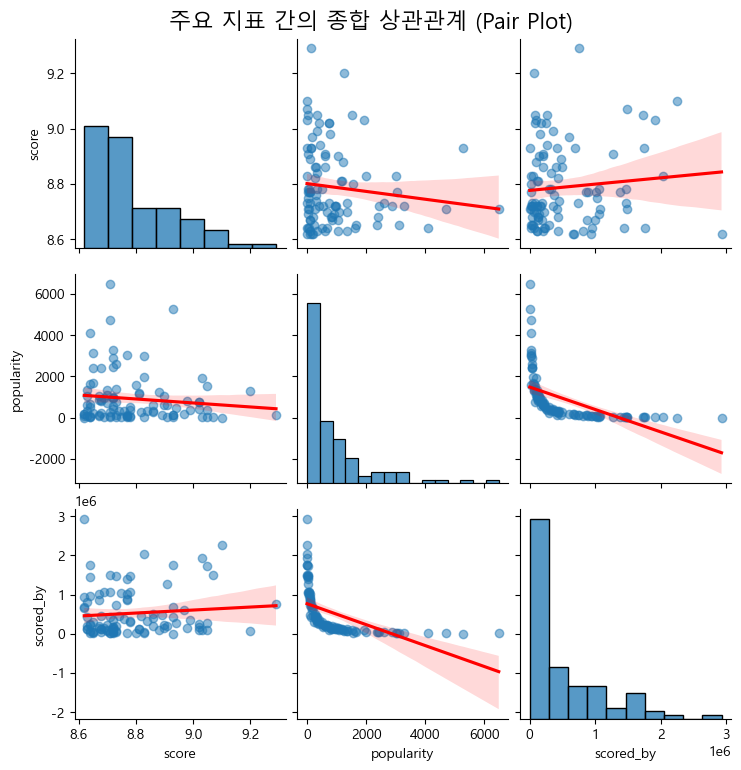

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

try:
    df_top = pd.read_csv('top_anime_filtered.csv')
    
    # 분석할 주요 숫자 컬럼 선택
    df_pair = df_top[['score', 'popularity', 'scored_by']].copy()
    
    # 유효한 데이터만 필터링 (0인 값 제외)
    df_pair = df_pair[df_pair['popularity'] > 0].dropna()

    # ‼️ 수정: 샘플링할 개수를 데이터 크기에 맞게 동적으로 조절
    n_samples = min(1000, len(df_pair))
    print(f"데이터 필터링 후 {len(df_pair)}개의 행이 남았습니다. {n_samples}개를 샘플링합니다.")

    # 시각화 (페어 플롯)
    print("⏳ 페어 플롯을 생성 중입니다...")
    sns.pairplot(df_pair.sample(n_samples, random_state=42), kind='reg', 
                 plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
    
    plt.suptitle('주요 지표 간의 종합 상관관계 (Pair Plot)', y=1.02, fontsize=16)
    plt.show()

except FileNotFoundError:
    print("❌ 'top_anime_filtered.csv' 파일을 찾을 수 없습니다.")
except Exception as e:
    print(f"❌ 기타 오류 발생: {e}")